# A Notebook showcasing the NTS-UK 2017

### Importing Libraries & Root folder

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import EVforecaster.config as cfg

dataframes_folder = cfg.root_folder + "/dataframes/"
plots_folder = cfg.root_folder + "/plots/"


### Importing Data

In [6]:
nts_uk_2017 = pd.read_pickle(dataframes_folder + "/trip_df_2017.pkl")

In [8]:
nts_uk_2017.head()

,TripID,DayID,IndividualID,HouseholdID,PSUID,PersNo,TravDay,JourSeq,TripStart,TripEnd,TripDisExSW,TripOrigGOR_B02ID,TripDestGOR_B02ID,TripType
15998,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,1.0,2.0,1.0,540.0,580.0,6.0,5.0,5.0,3
13370,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,1.0,2.0,2.0,960.0,995.0,6.0,5.0,5.0,4
15999,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,1.0,5.0,1.0,600.0,620.0,4.0,5.0,5.0,3
16606,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,1.0,5.0,2.0,690.0,710.0,4.0,5.0,5.0,4
11417,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,2.017000e+09,1.0,1.0,1.0,480.0,545.0,22.0,5.0,5.0,1


### Exploring TripType Proportions

In [52]:
triptype_vcs = nts_uk_2017.value_counts("TripType",normalize=True)

triptype_vcs.to_frame().round(3).sort_index()

,proportion
TripType,
1,0.118
2,0.113
3,0.304
4,0.308
5,0.023
6,0.019
7,0.016
8,0.099


### Trip Type Mapping

In [38]:
trip_type_mapping = {
    
    1:   "Home-Work",
    2:   "Work-Home",

    3:   "Home-Other",
    4:   "Other-Home",

    5:   "Work-Other",
    6:   "Other-Work",

    7:   "Home-Home",
    8:   "Other-Other",
    #"3-3": 9,   #Work-Work
}

### Plotting Distributions of TripStart and TripDisExSW across different trip types.

In [54]:
def plot_dists(df, trip_type_index, variable_index, mapping=trip_type_mapping):
    ## Comparing individual trip stats

    df = df.copy()
    df = df[df.TripType == trip_type_index]

    # Plot histogram
    #plt.figure(figsize=(7, 5))
    plt.hist(df[variable_index], bins=75, alpha=0.5, label="Real", color="blue", density=True)


    if variable_index == "TripDisExSW":
        plt.xlim(0,100)

    # Labels and legend
    plt.xlabel(f"{variable_index}")
    plt.ylabel("Density")
    plt.title(f"Histogram of {variable_index} for trip type: {mapping[trip_type_index]}.")
    plt.grid()

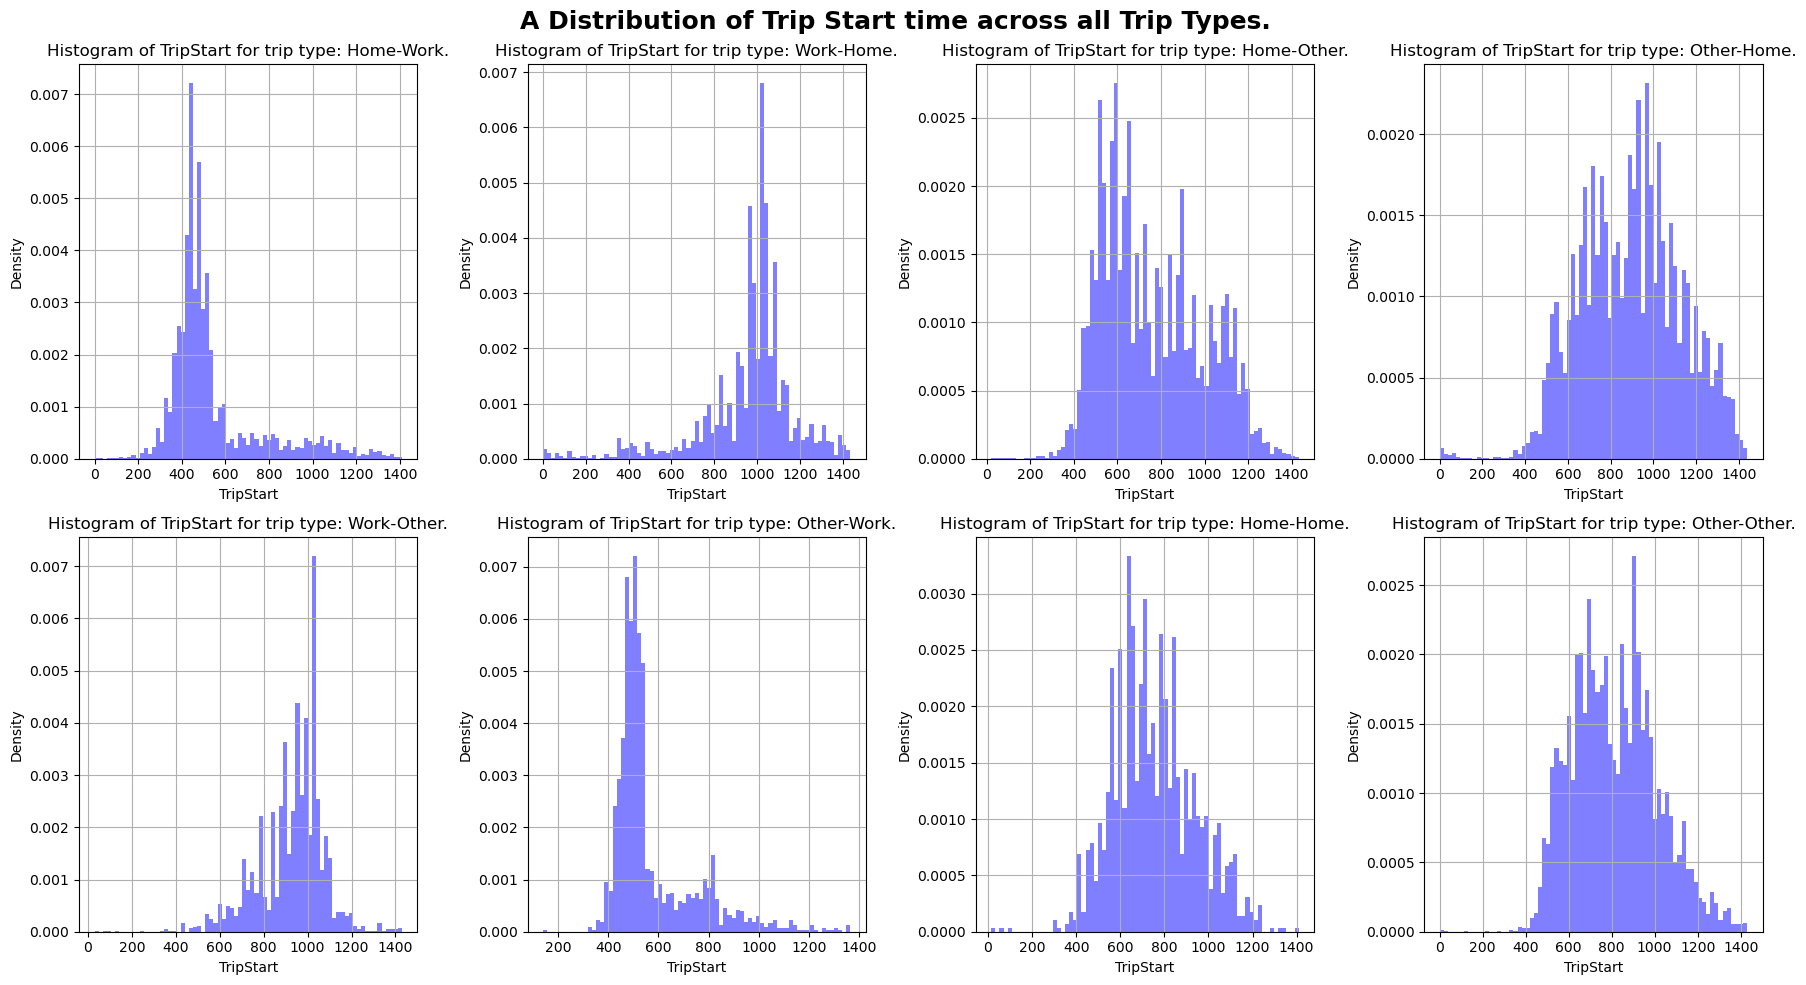

In [59]:
plt.figure(figsize=(18, 10))
# 🔹 Add an overall title
plt.suptitle("A Distribution of Trip Start time across all Trip Types.", fontsize=18, fontweight="bold")

for i in range(1,9):
    plt.subplot(2,4,i)
    plot_dists(df=nts_uk_2017, trip_type_index=i, variable_index="TripStart")


plt.tight_layout()  # Adjust layout to avoid overlap

plt.savefig(plots_folder + "/TripStartTripType.pdf", format="pdf", bbox_inches="tight")

plt.show()



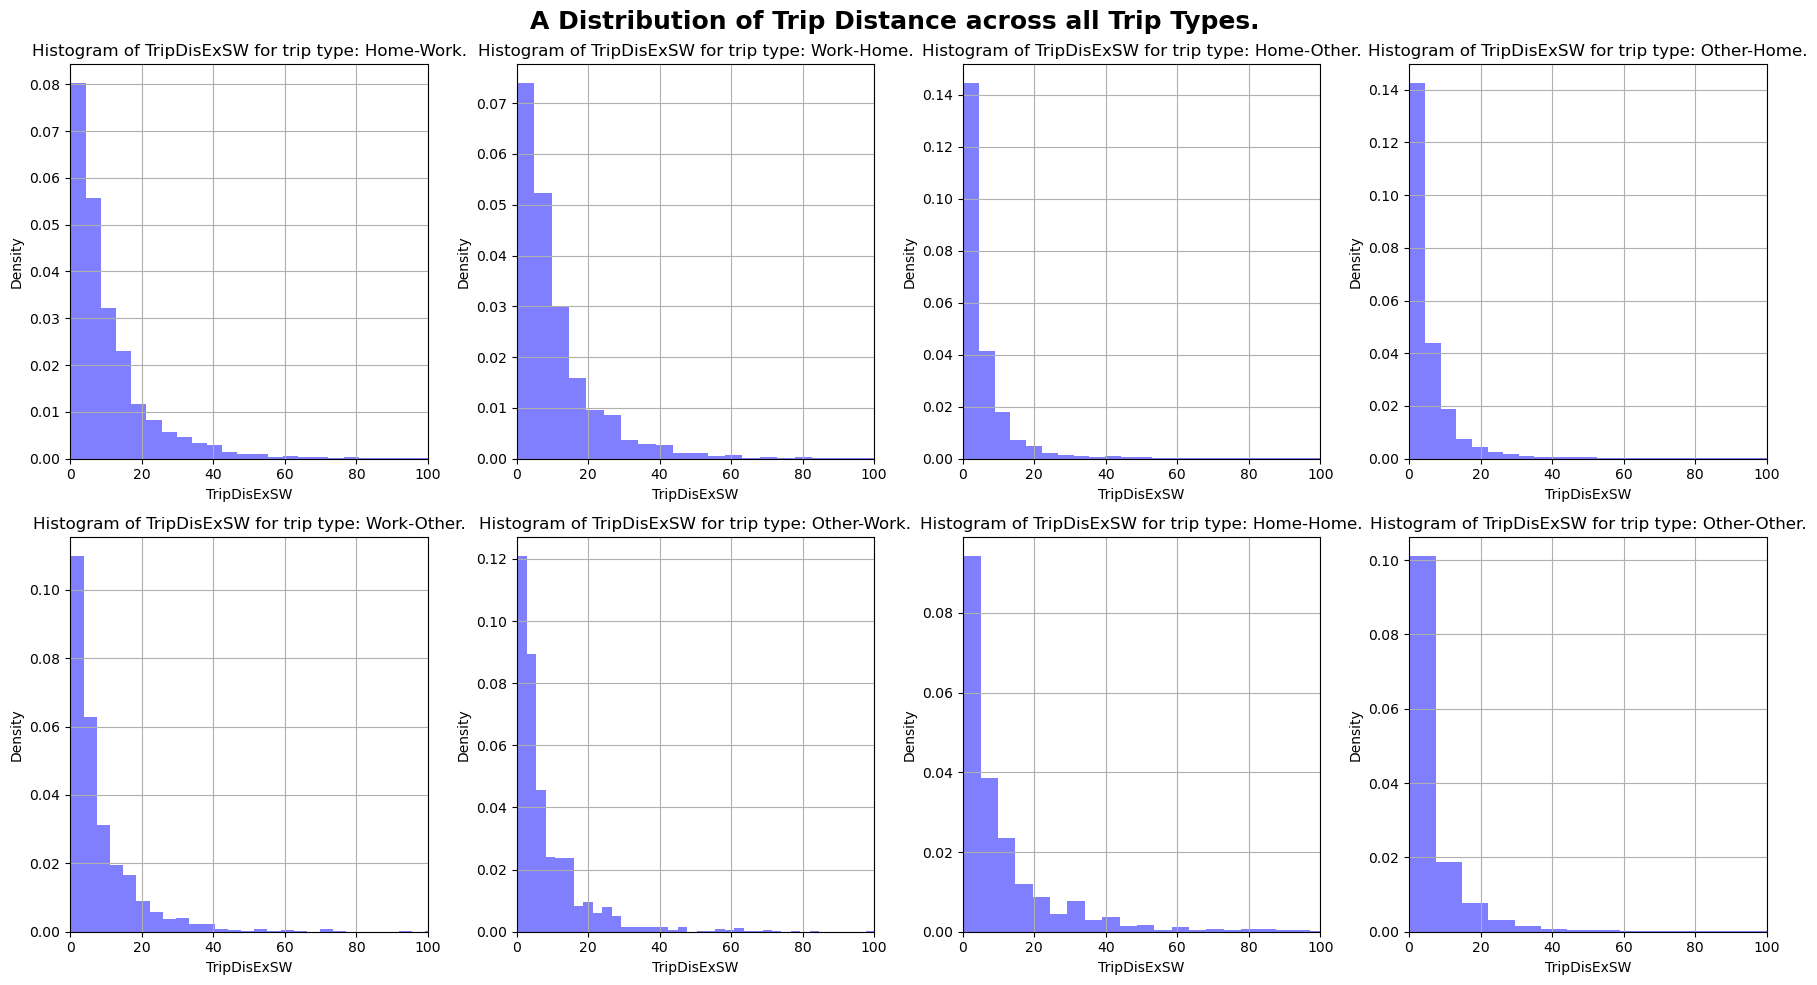

In [61]:
plt.figure(figsize=(18, 10))
# 🔹 Add an overall title
plt.suptitle("A Distribution of Trip Distance across all Trip Types.", fontsize=18, fontweight="bold")

for i in range(1,9):
    plt.subplot(2,4,i)
    plot_dists(df=nts_uk_2017, trip_type_index=i, variable_index="TripDisExSW")


plt.tight_layout()  # Adjust layout to avoid overlap

plt.savefig(plots_folder + "/DistanceTripType.pdf", format="pdf", bbox_inches="tight")
plt.show()
